In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리 
#from fiona.crs import from_epsg # 좌표변환 

import pyproj  # 좌표변환
#from pyproj import Proj, transform
from pyproj import Transformer, CRS

import shapely
from shapely.geometry.multipolygon import MultiPolygon 
from shapely.geometry import LineString, Point
from shapely import wkt


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid') #whitegrid, dark, white, ticks
mpl.rc('font', family='NanumGothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (16,4.5) #차트 사이즈

## Folium

In [6]:
#pip install folium  또는 !pip install folium
import folium

In [10]:
attr = (
    '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> '
    'contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>'
)
tiles = "http://{s}.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png"

m = folium.Map(location=[37.54, 126.96], tiles=tiles, attr=attr, zoom_start=10)

m

In [11]:
attr = ('&copy; <a href="http://xdworld.vworld.kr">브이월드</a> ')
tiles = "http://xdworld.vworld.kr:8080/2d/midnight/service/{z}/{x}/{y}.png"   #gray / midnight
m = folium.Map(location=[37.54, 126.96], tiles=tiles, attr=attr, zoom_start=10)
m

## geoplot과 contextily

In [12]:
gpd.__version__

'0.9.0'

In [13]:
pyproj.datadir.get_data_dir()

'C:\\Users\\dhl\\AppData\\Roaming\\Python\\Python38\\site-packages\\pyproj\\proj_dir\\share\\proj'

In [14]:
pyproj.__version__

'3.0.0.post1'

In [14]:
# shp 로딩
gdf_dong = gpd.read_file('./data/gdf_dong.shp', encoding='utf-8', crs='epsg:4326')  #euc-kr, euckr, utf-8, cp949 중 선택
gdf_dong.crs  #좌표계 확인용 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
gdf_dong.info()
gdf_dong.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3492 non-null   int64   
 1   adm_nm    3492 non-null   object  
 2   adm_cd    3492 non-null   object  
 3   adm_cd2   3492 non-null   object  
 4   sgg       3492 non-null   object  
 5   sido      3492 non-null   object  
 6   sidonm    3492 non-null   object  
 7   sggnm     3492 non-null   object  
 8   geometry  3492 non-null   geometry
dtypes: geometry(1), int64(1), object(7)
memory usage: 245.7+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,"POLYGON ((126.96067 37.58080, 126.96281 37.579..."


<AxesSubplot:>

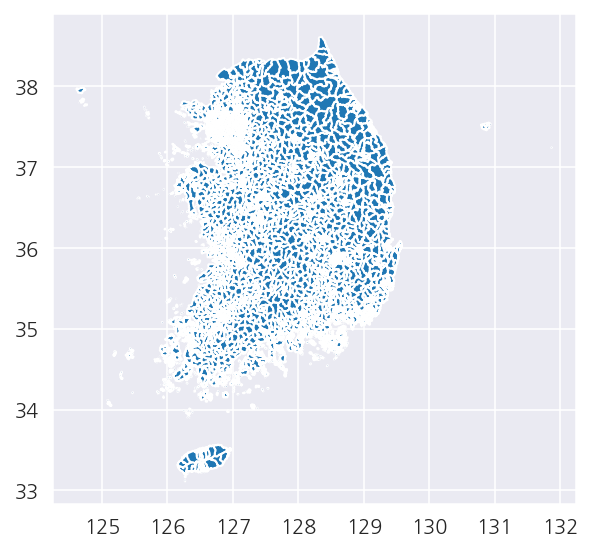

In [17]:
gdf_dong.plot()

In [15]:
gdf_dong2 = gdf_dong[ gdf_dong.sido == '11']

In [16]:
gdf_dong2['area'] = gdf_dong2.geometry.area

<ipython-input-16-4068c6f0cb37>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_dong2['area'] = gdf_dong2.geometry.area
C:\Users\dhl\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [17]:
gdf_dong2_3857 = gdf_dong2.to_crs(epsg=3857)

In [9]:
import cartopy

In [22]:
cartopy.__version__

'0.18.0'

In [10]:
import geoplot as gplt #conda install -c conda-forge geoplot
import geoplot.crs as gcrs

In [11]:
import contextily as ctx  #TMS 타일맵 지원 라이브러리

배경지도가 뒤집히는 원인을 찾아보면 
geoplot=0.4.1 이상, contextily=1.0 이상, cartopy=0.18 이상인 경우에는 문제가 없는 것으로 보여짐  
특히, cartopy 버전이 0.17일 때 문제인 것으로 보여짐  
https://ask.csdn.net/questions/1338797  

하지만, 저의 Anaconda 환경에서는 pip install cartopy==0.18 로 설치해도 0.17로 롤백되는 문제가 생김 

In [20]:
tms_vworld_g = 'http://xdworld.vworld.kr:8080/2d/gray/service/{z}/{x}/{y}.png'
tms_vworld_m = "http://xdworld.vworld.kr:8080/2d/midnight/service/{z}/{x}/{y}.png"
tms_stamen_t = 'http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'
tms_stamen_t2 = 'http://tile.stamen.com/terrain/{z}/{x}/{y}.png'

def add_basemap(ax, zoom, url):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, source=url)  
    ax.imshow(basemap, extent=(xmin, xmax, ymax, ymin ), interpolation='bilinear')  
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))  #xmin, xmax, ymin, ymax

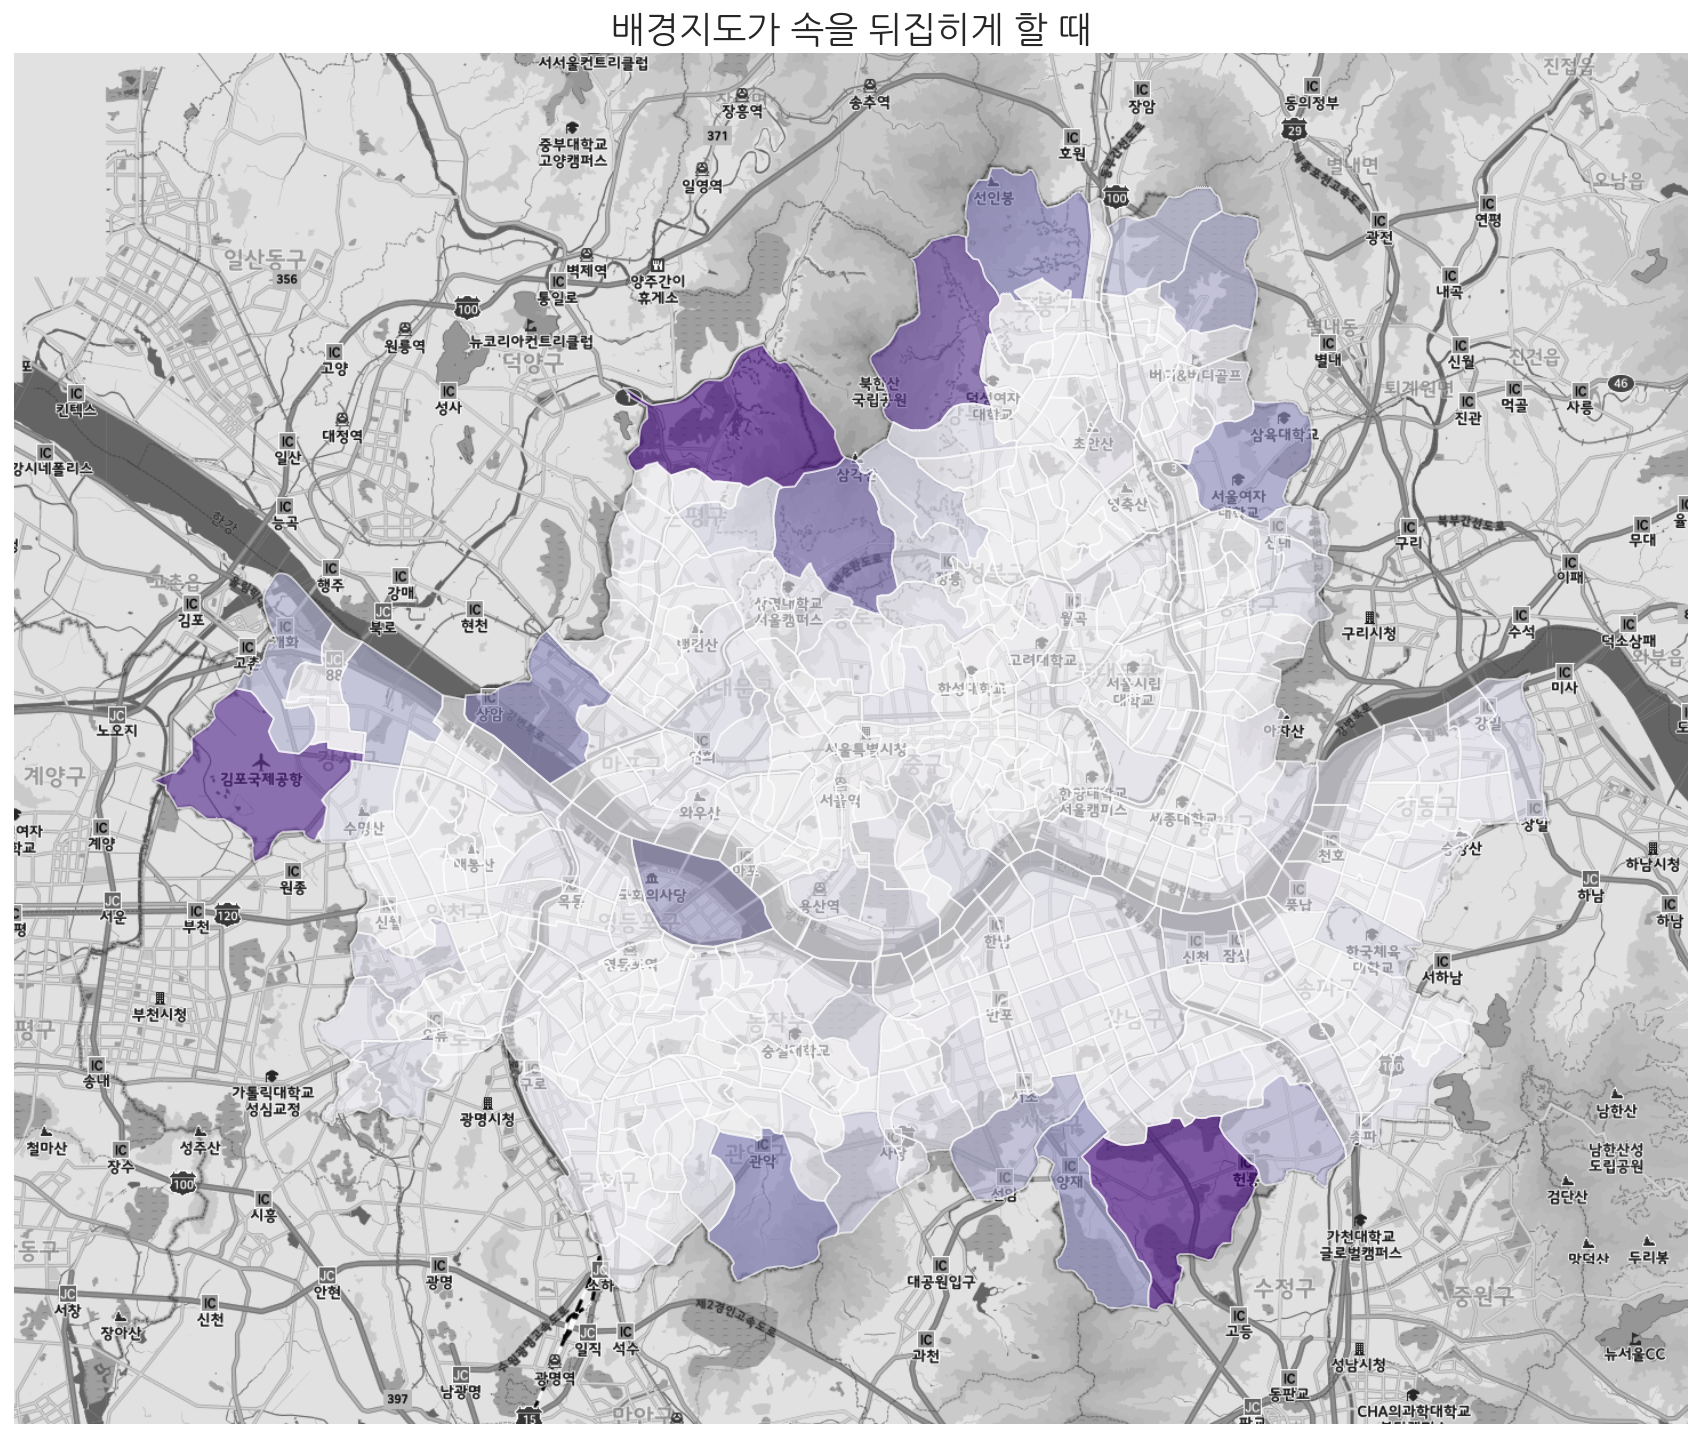

In [22]:
# Contextily  배경지도 적용한 공간시각화 
ax = gplt.choropleth(gdf_dong2, hue='area', cmap='Purples', projection=gcrs.WebMercator(), figsize=(15, 15), alpha=0.6)

#ctx.add_basemap(ax) #, url=ctx.providers.Stamen.TonerLite, 기본은 OpenStreetMap 
ctx.add_basemap(ax, source=tms_vworld_g) 
#add_basemap(ax, zoom=13, url=tms_vworld_g) 

plt.title('배경지도가 속을 뒤집히게 할 때', fontsize=18)
fig = plt.gcf()
#plt.savefig("./image/basemap_test01.png", bbox_inches='tight', pad_inches=0.01)